In [1]:
from AnastrisTNG import TNGsimulation,TNGtools,Anatools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
import gal1d

### 载入需要拟合的数据

In [3]:
BATHPATH='/home/dumin/IllustrisTNG/TNG50-1/output/'
snap99=TNGsimulation.Snapshot(BasePath=BATHPATH,Snap=99)

In [4]:
sub= snap99.load_particle(12)
sub.physical_units()
sub.face_on(alignwith='star',rmax=8)

In [5]:
bins = sub.r(np.linspace(0.01,0.99,100,),calfor='dm',calpa='mass')
pr = TNGtools.Profile(sub.dm,ndim=3,bins=bins)
rdm = pr['rbins'][pr['density']>0]
rhodm = pr['density'][pr['density']>0]

In [6]:
sub.R_vir(200)

SimArray(131.19771267, 'kpc')

### 拟合profile，有些profile参数过多，需要将BOUND范围设置小一些

In [7]:
gal1d.DoublePowerLawProfile.BOUND['alpha']=[0,5]
gal1d.DoublePowerLawProfile.BOUND['beta']=[0,10]
gal1d.DoublePowerLawProfile.BOUND['gamma']=[0,5]
dou,jic = gal1d.DoublePowerLawProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in dou.keys():
    print(i,dou[i])
dou.formular()

density_scale_radius 326511.0836496355
scale_radius 64.8606037259217
alpha 1.5402446398868617
beta 8.217590060959395
gamma 1.4720791781120428


In [8]:
nfw,jic = gal1d.NFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in nfw.keys():
    print(i,nfw[i])
nfw.formular()

scale_radius 5.607186007282391
density_scale_radius 57163184.00583833


In [9]:
gnfw,jic = gal1d.GNFWProfile.fit(rdm,rhodm,use_analytical_jac=True)
for i in gnfw.keys():
    print(i,gnfw[i])
gnfw.formular()

density_scale_radius 98609355.66346364
scale_radius 4.676146416620004
gamma 0.6793460964797394


In [ ]:
ein,jic = gal1d.EinastoProfile.fit(rdm,rhodm,use_analytical_jac=False)
for i in ein.keys():
    print(i,ein[i])
ein.formular()

density_scale_radius 5270812.220130537
scale_radius 9.466544963675743
Einasto_index 2.5365183314795994


### 半径以内的所有质量

In [ ]:
np.log10(gnfw.enclosed_mass(200))

11.521204875382391

In [12]:
np.log10(gnfw.Integrate(200))

11.521204875382484

In [13]:
np.log10(nfw.enclosed_mass([200,100]))

array([11.52238311, 11.4011462 ])

In [14]:
np.log10(nfw.Integrate([200,100]))

array([11.52238311, 11.4011462 ])

In [ ]:
np.log10(sub.dm['mass'].sum())

SimArray(11.30674471, 'Msol')

In [16]:
np.log10(ein.enclosed_mass(200))

11.353674900045833

In [17]:
np.log10(ein.total_mass())

11.35544372592583

Text(0, 0.5, 'log($|\\delta(\\rho)/\\rho|$)')

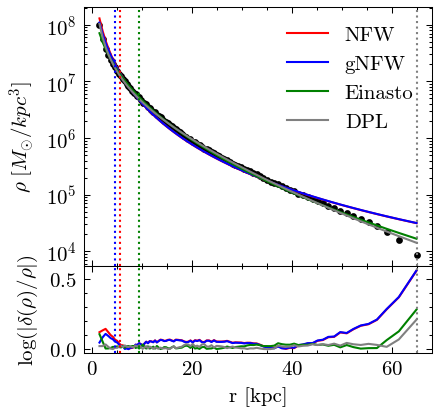

In [18]:
fig,axis = plt.subplots(2,1,dpi=150,height_ratios=[3,1],sharex=True,figsize=(3,3))
axis[0].scatter(rdm,rhodm,c='k',s=5)
axis[0].plot(rdm,nfw(rdm),c='r',label='NFW')
axis[0].plot(rdm,gnfw(rdm),c='b',label='gNFW')
axis[0].plot(rdm,ein(rdm),c='g',label='Einasto')
axis[0].plot(rdm,dou(rdm),c='grey',label='DPL')
#plt.plot(rdm,ein(rdm),c='y')
axis[0].set_yscale('log')
axis[1].plot(rdm, np.log10(np.abs((nfw(rdm)-rhodm)/rhodm)+1),c='r')
axis[1].plot(rdm, np.log10(np.abs((gnfw(rdm)-rhodm)/rhodm)+1),c='b')
axis[1].plot(rdm, np.log10(np.abs((ein(rdm)-rhodm)/rhodm)+1),c='g')
axis[1].plot(rdm,np.log10(np.abs((dou(rdm)-rhodm)/rhodm)+1),c='grey')

axis[0].axvline(gnfw['scale_radius'],c='b',linestyle=':')
axis[0].axvline(nfw['scale_radius'],c='r',linestyle=':')
axis[0].axvline(ein['scale_radius'],c='g',linestyle=':')
axis[0].axvline(dou['scale_radius'],c='grey',linestyle=':')
axis[1].axvline(gnfw['scale_radius'],c='b',linestyle=':')
axis[1].axvline(nfw['scale_radius'],c='r',linestyle=':')
axis[1].axvline(ein['scale_radius'],c='g',linestyle=':')
axis[1].axvline(dou['scale_radius'],c='grey',linestyle=':')
axis[0].legend(loc='best')
fig.subplots_adjust(hspace=0)
axis[1].set_xlabel('r [kpc]')
axis[0].set_ylabel(r'$\rho\ [M_{\odot}/kpc^{3}]$')
axis[1].set_ylabel(r'log($|\delta(\rho)/\rho|$)')

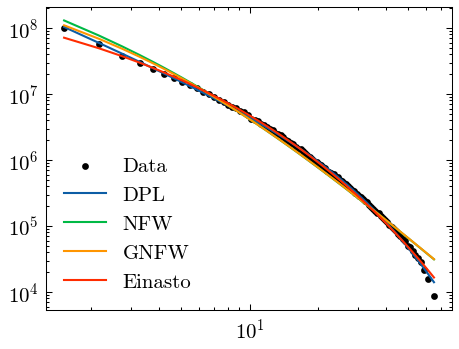

In [19]:
plt.figure(dpi=150)
plt.scatter(rdm,rhodm,label='Data',c='k',s=5)
plt.plot(rdm,dou(rdm),label='DPL')
plt.plot(rdm,nfw(rdm),label='NFW')
plt.plot(rdm,gnfw(rdm),label='GNFW')
plt.plot(rdm,ein(rdm),label='Einasto')
plt.legend()
plt.yscale('log')
plt.xscale('log')

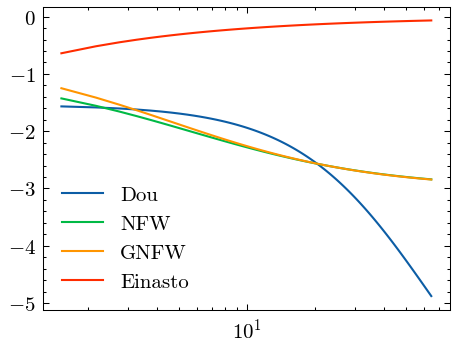

In [20]:
plt.figure(dpi=150)
plt.plot(rdm,dou.logarithmic_slope(rdm),label='Dou')
plt.plot(rdm,nfw.logarithmic_slope(rdm),label='NFW')
plt.plot(rdm,gnfw.logarithmic_slope(rdm),label='GNFW')
plt.plot(rdm,ein.logarithmic_slope(rdm),label='Einasto')
plt.legend()
#plt.yscale('log')
plt.xscale('log')

In [21]:
bins = sub.R(np.linspace(0.01,0.99,100),calfor='star',calpa='mass')
pR = TNGtools.Profile(sub.s,ndim=2,bins=bins)
Rstar = pR['rbins'][pR['density']>0]
denstar = pR['density'][pR['density']>0]

### 拟合以及表达式

In [22]:
gal1d.SersicProfile.BOUND['n']=[0.2,20]

ser,jic =gal1d.SersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in ser.keys():
    print(i,ser[i])
ser.formular()

n 2.5217098634862474
r_e 6.703822643454627
I_e 47725430.21436226


In [23]:
#gal1d.CoreSersicProfile.BOUND['n']=[0.2,20]

cor,jic =gal1d.CoreSersicProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in cor.keys():
    print(i,cor[i])
cor.formular()

I_b 2481861430.5835385
r_b 7.752301323100245
r_e 19.26757854708176
n 3.1563482827249847
alpha 1.5257420590423343
gamma 1.474936942478799


In [24]:
exp,jic =gal1d.ExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in exp.keys():
    print(i,exp[i])
exp.formular()

h 4.423844930921035
I_0 340767669.3646008


In [25]:
bexp,jic =gal1d.BrokenExponentialProfile.fit(Rstar,denstar,use_analytical_jac=True)
for i in bexp.keys():
    print(i,bexp[i])
#bexp.formular()

I_0 3417731517.144309
h1 0.4718810723614705
h2 5.642739232557647
r_b 1.4967014826450242
alpha 1.2486749919317484


### 所有质量

In [26]:
np.log10(ser.total_mass())

10.591041331453726

In [27]:
np.log10(exp.total_mass())

10.622238042802037

In [28]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

In [29]:
np.log10(bexp.enclosed_mass(20))

10.51164308701362

In [30]:
np.log10(cor.enclosed_mass(20))

10.501841214640264

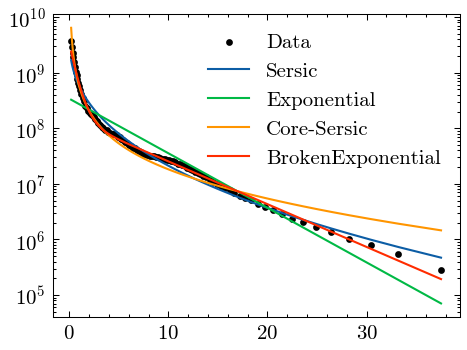

In [31]:

plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,ser(Rstar),label='Sersic')
plt.plot(Rstar,exp(Rstar),label='Exponential')
plt.plot(Rstar,cor(Rstar),label='Core-Sersic')
plt.plot(Rstar,bexp(Rstar),label='BrokenExponential')
plt.legend()
plt.yscale('log')

## 拟合多成分的曲线，用MultiProfiles，add_profile

In [32]:
Ser_Exp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n'] = [0,8]
Ser_Exp.add_profile(gal1d.SersicProfile)
Ser_Exp.add_profile(gal1d.ExponentialProfile)
Ser_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [33]:
Ser_Exp

<||SersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

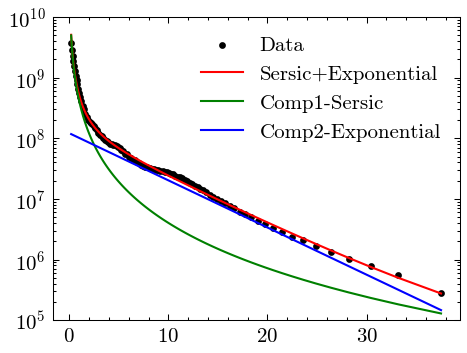

In [34]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Ser_Exp(Rstar),label='Sersic+Exponential',c='r')
plt.plot(Rstar,Ser_Exp['c1']*Ser_Exp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_Exp['c2']*Ser_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

### 半径以内的质量，以及各个成分的质量占比

In [35]:
np.log10(sub.s['mass'].sum())

SimArray(10.56524473, 'Msol')

In [36]:
np.log10(Ser_Exp.enclosed_mass(20))

10.52561828005214

In [37]:
np.array(Ser_Exp.components_enclosed_mass(20))/Ser_Exp.enclosed_mass(20)

array([0.38127623, 0.61872377])

In [38]:
Dou_Exp = gal1d.MultiProfiles()
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.add_profile(gal1d.ExponentialProfile)
Dou_Exp.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

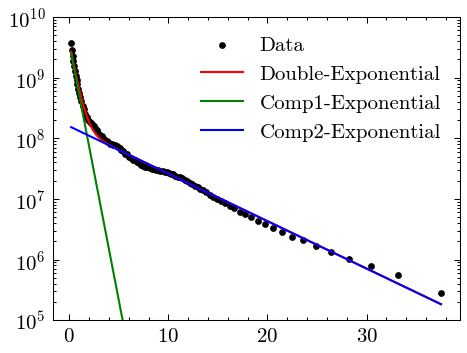

In [39]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Exp(Rstar),label='Double-Exponential',c='r')
plt.plot(Rstar,Dou_Exp['c1']*Dou_Exp['p1'](Rstar),label='Comp1-Exponential',c='g')
plt.plot(Rstar,Dou_Exp['c2']*Dou_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [40]:
np.array(Dou_Exp.components_enclosed_mass(20))/Dou_Exp.enclosed_mass(20)

array([0.18556879, 0.81443121])

In [41]:
gal1d.SersicProfile.BOUND

{'n': [0, 8], 'r_e': None, 'I_e': None}

In [56]:
Ser_BExp = gal1d.MultiProfiles()
gal1d.SersicProfile.BOUND['n']=[2,10]
Ser_BExp.add_profile(gal1d.SersicProfile)
gal1d.BrokenExponentialProfile.BOUND['alpha']=[0,10]
Ser_BExp.add_profile(gal1d.BrokenExponentialProfile)
Ser_BExp.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

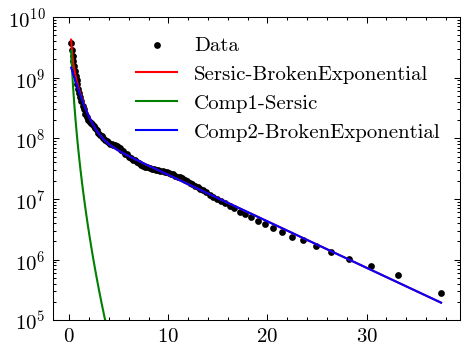

In [57]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Ser_BExp(Rstar),label='Sersic-BrokenExponential',c='r')
plt.plot(Rstar,Ser_BExp['c1']*Ser_BExp['p1'](Rstar),label='Comp1-Sersic',c='g')
plt.plot(Rstar,Ser_BExp['c2']*Ser_BExp['p2'](Rstar),label='Comp2-BrokenExponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [58]:
np.array(Ser_BExp.components_enclosed_mass(20))/Ser_BExp.enclosed_mass(20)

array([0.05651841, 0.94348159])

In [46]:
Dou_Ser = gal1d.MultiProfiles()
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.add_profile(gal1d.SersicProfile)
Dou_Ser.fit(Rstar,denstar,use_analytical_jac=True)

(100000.0, 10000000000.0)

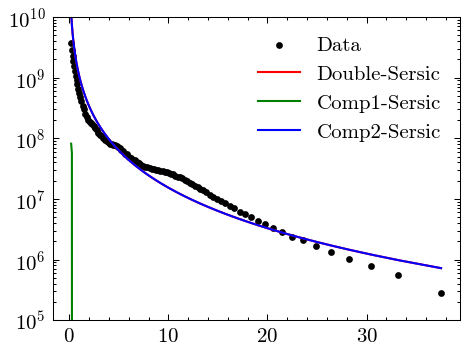

In [67]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,Dou_Ser(Rstar),label='Double-Sersic',c='r')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[0],label='Comp1-Sersic',c='g')
plt.plot(Rstar,Dou_Ser.components_profile(Rstar)[1],label='Comp2-Sersic',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [59]:
print(Dou_Ser['p2'])
for i in Dou_Ser['p2'].keys():
    print(i, Dou_Ser['p2'][i])

<SersicProfile['n', 'r_e', 'I_e']>
n 7.999999999358103
r_e 5.172525967009542
I_e 58964181.7593591


In [50]:
CorSer_Exp = gal1d.MultiProfiles()
CorSer_Exp.add_profile(gal1d.CoreSersicProfile)
CorSer_Exp.add_profile(gal1d.ExponentialProfile)
CorSer_Exp.fit(Rstar,denstar,use_analytical_jac=True)

In [51]:
CorSer_Exp

<||CoreSersicProfile|ExponentialProfile||>

(100000.0, 10000000000.0)

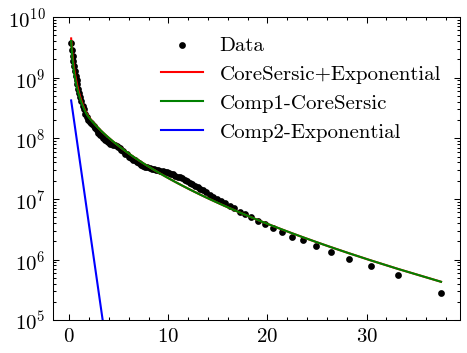

In [66]:
plt.figure(dpi=150)
plt.scatter(Rstar,denstar,label='Data',c='k',s=5)
plt.plot(Rstar,CorSer_Exp(Rstar.view(np.ndarray)),label='CoreSersic+Exponential',c='r')
plt.plot(Rstar,CorSer_Exp['c1']*CorSer_Exp['p1'](Rstar),label='Comp1-CoreSersic',c='g')
plt.plot(Rstar,CorSer_Exp['c2']*CorSer_Exp['p2'](Rstar),label='Comp2-Exponential',c='b')
plt.legend()
plt.yscale('log')
plt.ylim(1e5,1e10)

In [56]:
CorSer_Exp['p1']

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>

In [57]:
print(CorSer_Exp['p1'])
for i in CorSer_Exp['p1'].keys():
    print(i, CorSer_Exp['p1'][i])

<CoreSersicProfile['I_b', 'r_b', 'r_e', 'n', 'alpha', 'gamma']>
I_b 1339436846.418265
r_b 1.7972007728632624
r_e 7.743303260592182
n 1.967557369009247
alpha 19.348731733066654
gamma 1.2680686913203967


In [58]:
print(CorSer_Exp['p2'])
for i in CorSer_Exp['p2'].keys():
    print(i, CorSer_Exp['p2'][i])

<ExponentialProfile['h', 'I_0']>
h 0.3812580103923744
I_0 702997789.8080705
